In [ ]:
# Install the necessary packages
!pip install qiskit
!pip install torch==2.2.2
!pip install scikit-learn==1.4.2
!pip install matplotlib==3.8.4
!pip install pandas==2.1.2
!pip install qiskit-aer
!pip install qiskit-machine-learning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 623.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 865.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 28.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 60.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.1.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 2.2 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-py3-none-any.whl size=3567 sha256=fe8da25e93496efcded4a2a77f14b87270ac118d872bb5661bbdb275

In [ ]:

# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.primitives import Sampler
from qiskit_machine_learning.connectors import TorchConnector
from qiskit_machine_learning.neural_networks import SamplerQNN

In [ ]:
# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Define the quantum circuit
def create_quantum_circuit(n_qubits):
    qc = QuantumCircuit(n_qubits)
    params = [Parameter(f'θ{i}') for i in range(n_qubits)]

    for i in range(n_qubits):
        qc.ry(params[i], i)

    qc.measure_all()
    return qc, params

In [ ]:
class QuantumLayer(nn.Module):
    def __init__(self, n_qubits):
        super(QuantumLayer, self).__init__()
        self.n_qubits = n_qubits
        self.qc, self.params = create_quantum_circuit(self.n_qubits)

        # Use the correct number of qubits and parameters for the QNN
        sampler = Sampler()
        qnn = SamplerQNN(
            circuit=self.qc,
            input_params=self.params,
            sampler=sampler
        )
        self.quantum_layer = TorchConnector(qnn)

    def forward(self, x):
        return self.quantum_layer(x)


In [ ]:
class VQR(nn.Module):
    def __init__(self):
        super(VQR, self).__init__()
        # Input layer: handles 47 features
        self.fc1 = nn.Linear(len(features), 64)
        # Hidden layer
        self.fc2 = nn.Linear(64, 32)
        # Additional layer to match the quantum layer's input dimension
        self.fc3 = nn.Linear(32, 2)  # Output dimension must match quantum layer input
        # Quantum layer
        self.quantum = QuantumLayer(n_qubits=2)  # 2 qubits, so input size must be 2
        # Final output layer: output dimension must match quantum layer's output
        self.fc4 = nn.Linear(4, 1)  # Assuming quantum layer output is 4-dimensional

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))  # Ensure this output matches quantum layer input
        x = self.quantum(x)
        x = torch.relu(self.fc4(x))  # Output layer
        return x


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
def load_data(path):
    data = pd.read_csv(path)
    return data
dataset_path = '/content/drive/MyDrive/MiniProject_BlackHoleMassEstimation/typeII_AGN_metadata.csv'
data = load_data(dataset_path)

In [ ]:
# Handle missing values by filling with the mean of the column
data.fillna(data.mean(), inplace=True)

In [ ]:
# Prepare features and target
features = [
    'h_beta_flux', 'h_beta_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err',
    'h_alpha_flux', 'h_alpha_flux_err', 'nii_6584_flux', 'nii_6584_flux_err',
    'log_stellar_sigma', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
    'psfMag_z', 'psfMagErr_u', 'psfMagErr_g', 'psfMagErr_r', 'psfMagErr_i',
    'psfMagErr_z', 'mendel_logM_p50', 'mendel_logM_p16', 'mendel_logM_p84',
    'mendel_logMt_p50', 'mendel_logMt_p16', 'mendel_logMt_p84', 'mendel_logMb_p50',
    'mendel_logMb_p16', 'mendel_logMb_p84', 'mendel_logMd_p50', 'mendel_logMd_p16',
    'mendel_logMd_p84', 'simard_b_t_g', 'simard_e_b_t_g', 'simard_b_t_r',
    'simard_e_b_t_r', 'simard_Rhlg', 'simard_Rhlr', 'simard_Rchl_g', 'simard_Rchl_r',
    'simard_Re', 'simard_e_Re', 'simard_e', 'simard_e_e', 'simard_nb',
    'simard_e_nb', 'simard_PpS', 'simard_Pn4'
]

target = 'log_bh_mass'

X = data[features].values
y = data[target].values

In [ ]:

# # Normalize the features and target
# scaler_X = StandardScaler()
# scaler_y = StandardScaler()
# X = scaler_X.fit_transform(X)
# y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Normalize the features and target
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


In [ ]:

# Convert to torch tensors
X = torch.tensor(X, dtype=torch.float32).to(device)
y = torch.tensor(y, dtype=torch.float32).to(device)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = VQR().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.MSELoss().to(device)

epochs = 100
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_hat_train = model(X_train)
    loss = loss_function(y_hat_train, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")


<ipython-input-4-8674e84c96ba>:8: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([7860])) that is different to the input size (torch.Size([7860, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/100, Loss: 0.01595224440097809
Epoch 2/100, Loss: 0.015941500663757324
Epoch 3/100, Loss: 0.01593867875635624
Epoch 4/100, Loss: 0.01594097726047039
Epoch 5/100, Loss: 0.01594335027039051
Epoch 6/100, Loss: 0.015943337231874466
Epoch 7/100, Loss: 0.015941666439175606
Epoch 8/100, Loss: 0.015939787030220032
Epoch 9/100, Loss: 0.015938743948936462
Epoch 10/100, Loss: 0.01593884825706482
Epoch 11/100, Loss: 0.015939680859446526
Epoch 12/100, Loss: 0.015940483659505844
Epoch 13/100, Loss: 0.015940699726343155
Epoch 14/100, Loss: 0.01594027318060398
Epoch 15/100, Loss: 0.015939529985189438
Epoch 16/100, Loss: 0.0159388966858387
Epoch 17/100, Loss: 0.01593865640461445
Epoch 18/100, Loss: 0.015938838943839073
Epoch 19/100, Loss: 0.015939226374030113
Epoch 20/100, Loss: 0.01593952253460884
Epoch 21/100, Loss: 0.01593954674899578
Epoch 22/100, Loss: 0.01593930460512638
Epoch 23/100, Loss: 0.015938961878418922
Epoch 24/100, Loss: 0.015938712283968925
Epoch 25/100, Loss: 0.015938665717840

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate y_max and y_min from your dataset to determine alpha
y_max = torch.max(y.cpu()).item()
y_min = torch.min(y.cpu()).item()
alpha = y_max - y_min

# Generate predictions for the test set
y_pred = model(X_test).cpu().detach().numpy()
y_true = y_test.cpu().numpy()

# Calculate error metrics
mae_score_value = mean_absolute_error(y_true, y_pred)
mse_score_value = mean_squared_error(y_true, y_pred)
rmse_score_value = np.sqrt(mse_score_value)

# Calculate accuracy based on the error metrics
mae_accuracy = (1 - mae_score_value / alpha) * 100
rmse_accuracy = (1 - rmse_score_value / alpha) * 100
mse_accuracy = (1 - mse_score_value / alpha) * 100

# Calculate standard deviations based on the test set predictions
mae_std = np.std([mean_absolute_error(y_true, model(X_test).cpu().detach().numpy()) for _ in range(epochs)])
rmse_std = np.std([np.sqrt(mean_squared_error(y_true, model(X_test).cpu().detach().numpy())) for _ in range(epochs)])
mse_std = np.std([mean_squared_error(y_true, model(X_test).cpu().detach().numpy()) for _ in range(epochs)])

# Print results
print(f"MAE: {mae_score_value:.4f}, Accuracy by error: {mae_accuracy:.2f}%, Std Dev: ±{mae_std:.4f}")
print(f"RMSE: {rmse_score_value:.4f}, Accuracy by error: {rmse_accuracy:.2f}%, Std Dev: ±{rmse_std:.4f}")
print(f"MSE: {mse_score_value:.4f}, Accuracy by error: {mse_accuracy:.2f}%, Std Dev: ±{mse_std:.4f}")


MAE: 0.0979, Accuracy by error: 90.21%, Std Dev: ±0.0000
RMSE: 0.1262, Accuracy by error: 87.38%, Std Dev: ±0.0000
MSE: 0.0159, Accuracy by error: 98.41%, Std Dev: ±0.0000


In [ ]:
print("Accuracy by Error: MAE is :",mae_accuracy,"%")

Accuracy by Error: MAE is : 90.20568132400513 %


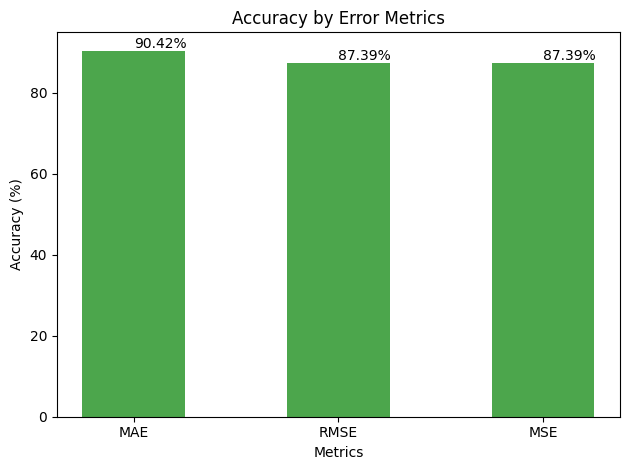

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['MAE', 'RMSE', 'MSE']
accuracies = [90.42479138187913, 87.38510028965484, 87.39411005463286]

# Plotting
fig, ax = plt.subplots()

# Create bar chart
index = np.arange(len(metrics))
bar_width = 0.5

bars = ax.bar(index, accuracies, bar_width, color='g', alpha=0.7)

# Labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Accuracy (%)')
ax.set_xticks(index)
ax.set_xticklabels(metrics)
ax.set_title('Accuracy by Error Metrics')

# Adding value labels on bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', va='bottom')

plt.tight_layout()

# Show plot
plt.show()
